# Task 1

#code written by mahima chowdary maddineni

predicting the marks of students based on number of hours studied.

In [21]:
# Importing libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

In [22]:
# Reading data
data = pd.read_csv("http://bit.ly/w-data")
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [23]:
#showing correlation among variables
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


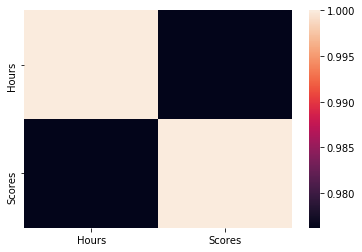

In [24]:
sns.heatmap(data.corr())

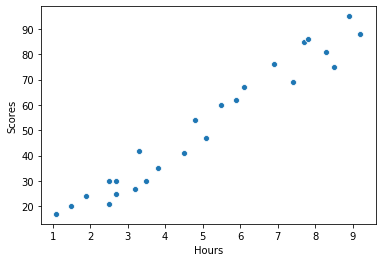

In [25]:
#plotting the data
sns.scatterplot(x="Hours", y="Scores", data=data)

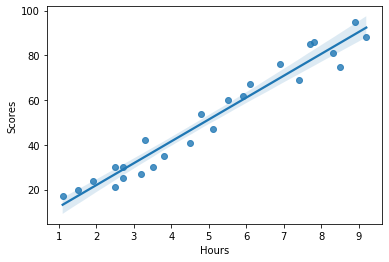

In [26]:
#as we can see linearity and there is high correlation we can draw a regression line
sns.regplot(x="Hours", y="Scores", data=data);

In [27]:
X = data.iloc[:,0:1].values  
y = data.iloc[:, 1].values  

In [28]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [29]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [30]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [31]:
#creating and fitting data into the model
from sklearn.linear_model import LinearRegression  
m = LinearRegression() 
m.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
#predicting the scores(y_pred) of hours(x_test) 
y_pred = m.predict(X_test)
print('y (actual)=   {} \ny (predicted)={}'.format(y_test,y_pred))

y (actual)=   [20 27 69 30 62] 
y (predicted)=[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [33]:
#comparing actual scores (y_test) and predicted (y_pred)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# predicting the score of a student who studied for 9.25 hours in a day

In [34]:
hours =[[ 9.25 ]]
pred = m.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


evaluating the model

In [35]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


In [36]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)


0.9454906892105356